![](FBD.png)

Equations:
$$T = 1/2m((\dot{z})^2+(\dot{y})^2)$$
$$y = lsin\theta \dot{y} = l\dot{\theta} cos\theta$$
$$v = mgz$$
$$L = 1/2m((-l{\dot \theta})^2 + (l cos\theta)^2) - mglcos\theta$$
$$d/dt(\partial L/(\partial \dot{y})) - \partial L/\partial y = f$$
$$\partial L/\partial \dot{y} = ml\dot{\theta} cos\theta$$
$$\partial L/\partial \dot{\theta} = m \dot{\theta} l^2$$
$$d/dt(\partial L/ \partial \dot{\theta}) - \partial L/ \partial \theta = 0$$
$$\partial L/\partial y = 0$$
$$\partial L/\partial \theta = mglsin\theta$$

Equations:
$$T = \frac{1}{2m}((\dot z)^2+(\dot y)^2)$$
$$y = lsin\theta \dot y = l \dot \theta cos\theta$$
$$v = mgz$$
$$L = \frac{1}{2m}((-l\dot \theta)^2 + (l cos\theta)^2) - mglcos\theta$$
$$\frac{d}{dt}(\frac{\partial L}{\partial \dot y}) - \frac{\partial L}{\partial y} = f$$
$$\frac{\partial L}{\partial \dot y} = ml\dot \theta cos\theta$$
$$\frac{\partial L}{\partial \dot \theta} = m \dot \theta l^2$$
$$\frac{d}{dt}(\frac{\partial L}{ \partial \dot \theta}) - \frac{\partial L}{ \partial \theta} = 0$$
$$\frac{\partial L}{\partial y} = 0$$
$$\frac{\partial L}{\partial \theta} = mglsin\theta$$

$$ml(\ddot{\theta} - \dot{\theta} sin\theta) = f$$
$$m\ddot{\theta} l^2 - mglsin\theta = 0$$

Using the small angle approximation $cos\theta$ and $sin\theta = \theta$:
$$ml \ddot{\theta} \theta = f$$
$$m \ddot{\theta} l^2 - mgl\theta = 0$$
$$m \ddot{\theta} = mgsin\theta$$
$$\dot{\omega} = g\theta/l$$
$$J\ddot{\theta} = (f-mgsin\theta)l$$
$$\dot{\omega} = f/ml\theta$$
$$\dot{\omega} = fl/J - mgl\theta/J$$
$$f = f - mg\theta$$

$$\Longrightarrow \begin{bmatrix} \dot{\theta} \\ \dot{\omega} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} \theta \\ \omega \end{bmatrix} + \begin{bmatrix} 0 \\ l/J \end{bmatrix} f_m'$$

For torque and force:
$$\tau = rf = -(k^2/R)\omega + (k/R)e$$
$$m\ddot{y} = f - mg\theta$$
$$f = -(k^2/Rr)\omega + (k/Rr)e$$

For state variables $\omega$ and $\theta$:
$$\theta[n + 1] = \theta[n] + t_s\omega[n]$$
$$\omega[n + 1] = \omega[n] + t_s\alpha[n]$$
$$\alpha[n] = \gamma k_p(\theta_d - \theta[n])$$

M = 0.023000
m = 0.026400
l = 0.2500
r1 = 5.0000e-03
r2 = 6.0000e-03
g = 9.8100
J = 1.9879e-03
A =

         0    1.0000
  -28.3740         0

B =

          0
   125.7545

C =

   1   0
   0   1


dCopterSys.a =
             x1        x2
   x1    0.9996  0.004999
   x2   -0.1419    0.9996

dCopterSys.b =
             u1
   x1  0.001572
   x2    0.6287

dCopterSys.c =
       x1  x2
   y1   1   0
   y2   0   1

dCopterSys.d =
       u1
   y1   0
   y2   0

Sampling time: 0.005 s
Discrete-time model.
Eigenvectors and eigenvalues of A:
v =

        0 - 0.1845i        0 + 0.1845i
   0.9828 +      0i   0.9828 -      0i

D =

Diagonal Matrix

        0 + 5.3267i                  0
                  0        0 - 5.3267i

ans =

          0   125.7545
   125.7545          0



Inline plot failed, consider trying another graphics toolkit
DEBUG: FC_WEIGHT didn't match
DEBUG: FC_WEIGHT didn't match
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



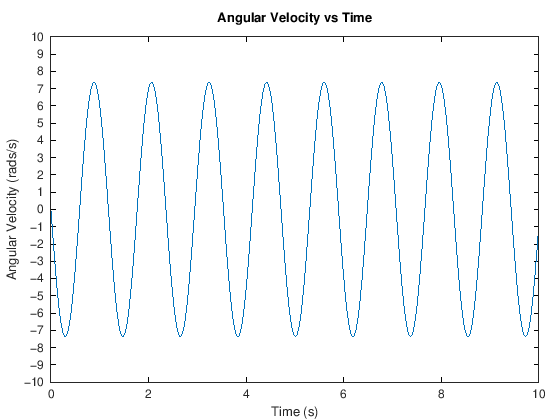

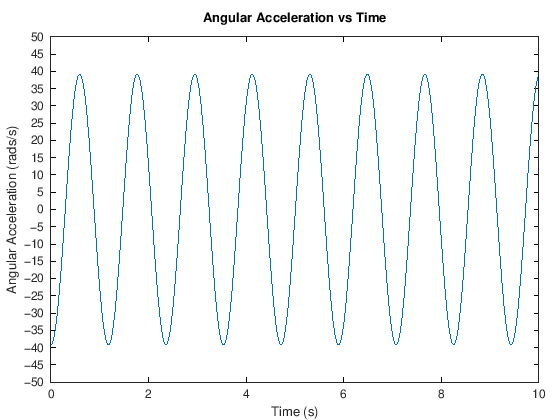

In [6]:
clear all; close all;
pkg load control
pkg load signal
set(gcf,'Visible','on')
graphics_toolkit("gnuplot")

% First set up the parameters for the pendulum/Hover Copter Arm.
M = 0.0230 % Mass of the motor (kg)
m = 0.0264 % mass of the rod/arm (kg)
l = 0.25 % length of the hover copter arm (meters)
r1 = 0.005 % inner radius of rod/arm (m)
r2 = 0.006 % outer radius of rod/arm (m)
g = 9.81  % gravity (m/s^2)
%s = 1  %  -1 for hanging down; +1 for up
%R = 0.6 (Ohms) -> Not needed for this since the motor is off and isn't a pivot point

% Calculate TOTAL J (moment of inertia)
J = (m/12)*(3*(r1^2 + r2^2) + (2*l)^2) + M*l^2
% (using the I_y equation from https://amesweb.info/inertia/hollow-cylinder-moment-of-inertia.aspx)

function [CopterSys, A, B, C, D] = setupModel(M=0.0230, m=0.0264, l=0.25, g=9.81, s=1, J=0.001988)
    % State model ve
    A = [[0, 1];[-M*g*l/J, 0]];
    B = [0; l/J];
    C = [[1, 0]; [0, 1]];
    D = 0;
    CopterSys = ss(A, B, C, D);
endfunction

[CopterSys, A, B, C, D] = setupModel();
A
B
C
dCopterSys = c2d(CopterSys,.005)
t = 0:0.01:10;

y = lsim(CopterSys,zeros(size(t)),t,[0;-39.2]);
disp('Eigenvectors and eigenvalues of A:')
[v,D] = eig(CopterSys.a) % Better be all negative for hanging down.
ctrb(CopterSys.a,CopterSys.b)

ytic1 = -10:1:10;
ytic2 = -50:5:50;


figure 

plot(t,y(:,1))
set(gca, "fontsize", 18)
title("Angular Velocity vs Time")
xlabel("Time (s)");
ylabel("Angular Velocity (rads/s)");
ylim("Manual");
ylim([-10 10]);
yticks(ytic1);

figure 

plot(t,y(:,2))
set(gca, "fontsize", 18)
title("Angular Acceleration vs Time")
xlabel("Time (s)");
ylabel("Angular Acceleration (rads/s)");
ylim("Manual");
ylim([-50 50]);
yticks(ytic2);




%ylim([-10 10])

M = 0.023000
m = 0.026400
l = 0.2500
r1 = 5.0000e-03
r2 = 6.0000e-03
g = 9.8100
J = 1.9879e-03
A =

         0    1.0000
  -28.3740   -0.8000

B =

          0
   125.7545

C =

   1   0
   0   1


dCopterSys.a =
             x1        x2
   x1    0.9996  0.004989
   x2   -0.1416    0.9957

dCopterSys.b =
            u1
   x1  0.00157
   x2   0.6274

dCopterSys.c =
       x1  x2
   y1   1   0
   y2   0   1

dCopterSys.d =
       u1
   y1   0
   y2   0

Sampling time: 0.005 s
Discrete-time model.
Eigenvectors and eigenvalues of A:
v =

  -0.0139 - 0.1840i  -0.0139 + 0.1840i
   0.9828 +      0i   0.9828 -      0i

D =

Diagonal Matrix

  -0.4000 + 5.3117i                  0
                  0  -0.4000 - 5.3117i

ans =

          0   125.7545
   125.7545  -100.6036



Inline plot failed, consider trying another graphics toolkit
DEBUG: FC_WEIGHT didn't match
DEBUG: FC_WEIGHT didn't match
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



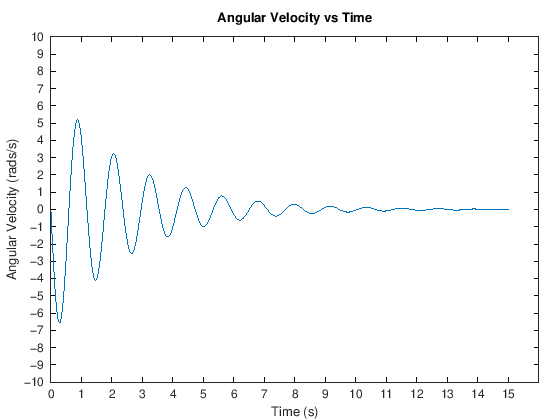

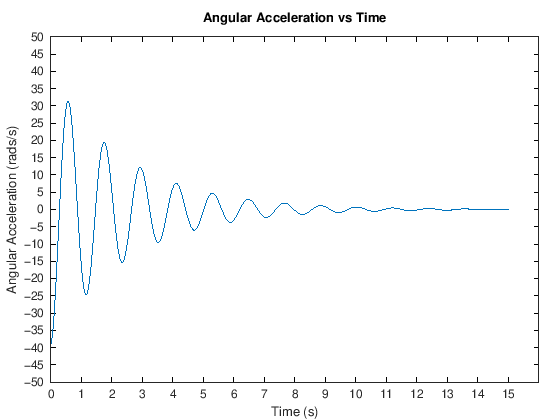

In [2]:
clear all; close all;
pkg load control
pkg load signal
set(gcf,'Visible','on')
graphics_toolkit("gnuplot")

% First set up the parameters for the pendulum/Hover Copter Arm.
M = 0.0230 % Mass of the motor (kg)
m = 0.0264 % mass of the rod/arm (kg)
l = 0.25 % length of the hover copter arm (meters)
r1 = 0.005 % inner radius of rod/arm (m)
r2 = 0.006 % outer radius of rod/arm (m)
g = 9.81  % gravity (m/s^2)
%s = 1  %  -1 for hanging down; +1 for up
%R = 0.6 (Ohms) -> Not needed for this since the motor is off and isn't a pivot point

% Calculate TOTAL J (moment of inertia)
J = (m/12)*(3*(r1^2 + r2^2) + (2*l)^2) + M*l^2
% (using the I_y equation from https://amesweb.info/inertia/hollow-cylinder-moment-of-inertia.aspx)

function [CopterSys, A, B, C, D] = setupModel(M=0.0230, m=0.0264, l=0.25, g=9.81, s=1, J=0.001988)
    % State model
    A = [[0, 1];[-M*g*l/J, -0.8]];
    B = [0; l/J];
    C = [[1, 0]; [0, 1]];
    D = 0;
    CopterSys = ss(A, B, C, D);
endfunction

[CopterSys, A, B, C, D] = setupModel();
A
B
C
dCopterSys = c2d(CopterSys,.005)
t = 0:0.01:15;

y = lsim(CopterSys,zeros(size(t)),t,[0;-39.2]);
disp('Eigenvectors and eigenvalues of A:')
[v,D] = eig(CopterSys.a) % Better be all negative for hanging down.
ctrb(CopterSys.a,CopterSys.b)

ytic1 = -10:1:10;
ytic2 = -50:5:50;
xtic  = -15:1:15;

figure 

plot(t,y(:,1))
set(gca, "fontsize", 18)
title("Angular Velocity vs Time")
xlabel("Time (s)");
ylabel("Angular Velocity (rads/s)");
ylim("Manual");
ylim([-10 10]);
yticks(ytic1);
xticks(xtic);

figure

plot(t,y(:,2))
set(gca, "fontsize", 18)
title("Angular Acceleration vs Time")
xlabel("Time (s)");
ylabel("Angular Acceleration (rads/s)");
ylim("Manual");
ylim([-50 50]);
yticks(ytic2);
xticks(xtic);

### Hand Placing Poles & Gain Calculations

In [3]:
% Hand Placing Poles
A = [[0, 1];[-M*g*l/J, -0.8]];
% A = [[0, 1];[0, -0.8]];
B = [0; l/J];


% u = -Gx = -G_1*theta - G_2*theta_dot
poles = [-10 -5];

G = place(A, B, poles)
dG = place(dCopterSys, poles)

G =

   0.1720   0.1129

    place at line 139 column 25

dG =

   2.1036e+04  -2.5542e+01



### LQR Pole Placement & Gain Calculations

In [4]:
% Place Poles with LQR


A = [[0, 1];[-M*g*l/J, -0.8]];
B = [0; l/J];

Q = [[0.8 0];[0 0.01]];
R = [10];

G_lqr = lqr(A, B, Q, R)
G_dlqr = dlqr(dCopterSys, Q, R)

G_lqr =

   0.136183   0.050262

G_dlqr =

   0.130511   0.049707



Full Order Observer

Find Kf
kf =

   6.5377e-04  -4.9966e-04
  -4.9966e-04   1.8142e-02

p =

   6.5377e-04  -4.9966e-04
  -4.9966e-04   1.8142e-02

e =

  -0.4094 + 5.3124i
  -0.4094 - 5.3124i

Steve Brunton said the following would do the same as lqe but it gives significantly different values
kf =

   0.040607  -0.048022
  -0.048022   1.060915

Find discrete Kf
dkf =

   0.017878  -0.020254
  -0.020254   0.077766

dp =

   0.018665  -0.022372
  -0.022372   0.084814

de =

   0.017878  -0.020254
  -0.020254   0.077766

Simulation of system

sysC.a =
           x1      x2
   x1       0       1
   x2  -28.38    -0.8

sysC.b =
          u1     u2     u3     u4
   x1      0    0.1      0      0
   x2  125.8      0    0.1      0

sysC.c =
       x1  x2
   y1   1   0
   y2   0   1

sysC.d =
       u1  u2  u3  u4
   y1   0   0   1   0
   y2   0   0   0   1

Continuous-time model.
System with full state output no noise

sysFull.a =
           x1      x2
   x1       0       1
   x2  -28.38    -0.8

sysFull.b =
 

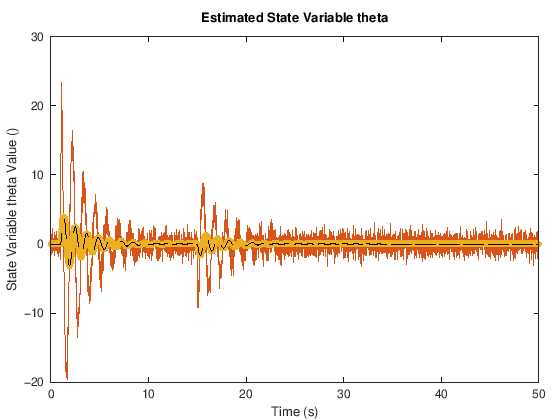

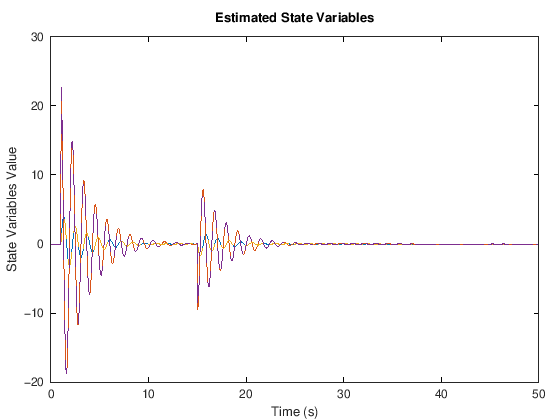

In [51]:

%D = zeros(size(C,1),size(B,2))
Vd = .1*eye(2);
Vn = 1*eye(2);
Bf= [B Vd 0*B]; % augment inputs with disturbance and noise
A = [[0, 1];[-M*g*l/J, -0.8]];
B = [0; l/J];
C = [1 0;0 1];


disp("Find Kf")
[kf,p,e] = lqe(A,Vd,C,Vd,Vn)
disp("Steve Brunton said the following would do the same as lqe but it gives significantly different values")
kf = (lqr(A',C',Vd,Vn))
disp("Find discrete Kf")
[dkf,dp,de] = dlqe(dCopterSys.a,Vd,C,Vd,Vn)


disp("Simulation of system")
sysC = ss(A,Bf,C,[0*Vn Vn])

disp("System with full state output no noise")
sysFull = ss(A,Bf,eye(2),zeros(2,size(Bf,2)))

disp("Estimated linearized system with noise and disturbances")
sysKF = ss(A-kf*C,[B kf],eye(2),0*[B kf])

disp("Simulation of discrete system")
dsysC = c2d(sysC,.005)  %Simulation of discrete system

disp("Discrete system with full state output no noise")
dsysFull = c2d(sysFull,.005) %Discrete system with full state output no noise

disp("Estimated linearized discrete system with noise and disturbances")
dsysKF = c2d(sysKF,.005) %Estimated linearized discrete system with noise and disturbances

dt = .01;
t = dt:dt:50;
% tr = [t;t];
% t = tr';
uDIST = randn(2,size(t,2));
uNOISE = randn(size(t));
u=0*t;
u(100:105) = 3.14;
u(1500:1505) = -1.32;
uAUG = [u; Vd*Vd*uDIST;uNOISE]';

[y,lkj,x] = lsim(sysC,uAUG,t);
plot(lkj,y)

[xtrue,t] = lsim(sysFull,uAUG,t);
hold on
plot(t,xtrue(:,1),'p','LineWidth',2.0)
[x,t] = lsim(sysKF,[u;y'],t);
plot(t,x(:,1)','k--','LineWidth',2.0)
set(gca, "fontsize", 18)
title("Estimated State Variable theta")
xlabel("Time (s)");
ylabel("State Variable theta Value ()");
% ylim("Manual");
% ylim([-50 50]);
% yticks(ytic2);
% xticks(xtic);

figure
plot(t,xtrue,'-',t,x,'--','LineWidth',2)
set(gca, "fontsize", 18)
title("Estimated State Variables")
xlabel("Time (s)");
ylabel("State Variables Value");
% ylim("Manual");
% ylim([-50 50]);
% yticks(ytic2);
% xticks(xtic);


% Controllabilty and Observability %
%controllability = ctrb(CopterSys)
%observability = obsv(CopterSys)
%numUnobservableStates = length(A) - rank(observability)

### Reduced Order Observer

Bf =

          0     0.1000          0          0
   125.7607          0     0.1000          0

kf =

   6.6085e-04
  -4.9978e-04

p =

   6.6085e-04  -4.9978e-04
  -4.9978e-04   1.8352e-02

e =

  -0.4003 + 5.3118i
  -0.4003 - 5.3118i

dkf =

   3.1655e-02
   3.4249e-03

dp =

   3.2690e-02   3.5368e-03
   3.5368e-03   9.2157e-01

de =

   3.1655e-02   3.4249e-03
   3.4249e-03   9.2156e-01

kf =

   0.063585
  -0.047978

error: lsim: length of time vector (5000) doesn't match input signal (2x5000)
error: called from
    lsim>__linear_simulation__ at line 250 column 7
    lsim at line 145 column 13


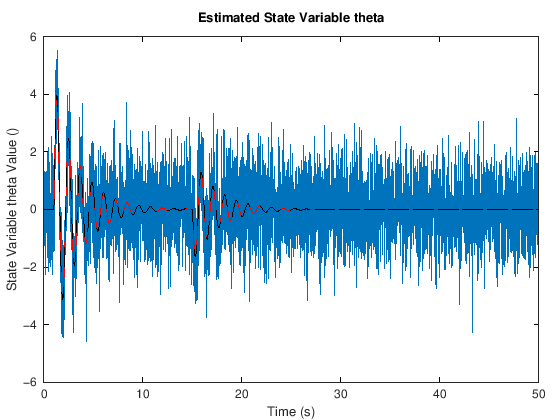

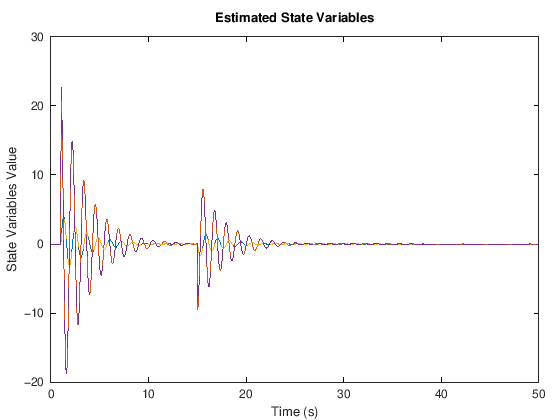

In [28]:

%D = zeros(size(C,1),size(B,2))
Vd = .1*eye(2);
Vn = 1;
Bf= [B Vd 0*B] % augment inputs with disturbance and noise
A = [[0, 1];[-M*g*l/J, -0.8]];
B = [0; l/J];
C = [1 0];

%Find Kf
[kf,p,e] = lqe(A,Vd,C,Vd,Vn)
%Find discrete Kf
[dkf,dp,de] = dlqe(dCopterSys.a,Vd,C,Vd,Vn)

kf = (lqr(A',C',Vd,Vn))' %Steve Brunton said this would do the same as lqe but it gives significantly different valuse

sysC = ss(A,Bf,C,[0 0 0 Vn]); %Simulation of system
sysFull = ss(A,Bf,eye(2),zeros(2,size(Bf,2))); %System with full state output no noise
sysKF = ss(A-kf*C,[B kf],eye(2),0*[B kf]); %Estimated linearized system with noise and disturbances

dsysC = c2d(sysC,.005);  %Simulation of discrete system
dsysFull = c2d(sysFull,.005); %Discrete system with full state output no noise
dsysKF = c2d(sysKF,.005); %Estimated linearized discrete system with noise and disturbances

dt = .01;
t = dt:dt:50;
% tr = [t;t];
% t = tr';
uDIST = randn(2,size(t,2));
uNOISE = randn(size(t));
u=0*t;
u(100:105) = 3.14;
u(1500:1505) = -1.32;
uAUG = [u; Vd*Vd*uDIST;uNOISE]';

[y,lkj,x] = lsim(sysC,uAUG,t);
plot(lkj,y)

[xtrue,t] = lsim(sysFull,uAUG,t);
hold on
plot(t,xtrue(:,1),'r','LineWidth',2.0)
[x,t] = lsim(sysKF,[u;y'],t);
plot(t,x(:,1)','k--','LineWidth',2.0)
set(gca, "fontsize", 18)
title("Estimated State Variable theta")
xlabel("Time (s)");
ylabel("State Variable theta Value ()");
% ylim("Manual");
% ylim([-50 50]);
% yticks(ytic2);
% xticks(xtic);

figure
plot(t,xtrue,'-',t,x,'--','LineWidth',2)
set(gca, "fontsize", 18)
title("Estimated State Variables")
xlabel("Time (s)");
ylabel("State Variables Value");
% ylim("Manual");
% ylim([-50 50]);
% yticks(ytic2);
% xticks(xtic);


% Controllabilty and Observability %
%controllability = ctrb(CopterSys)
%observability = obsv(CopterSys)
%numUnobservableStates = length(A) - rank(observability)

Discrete Reduced Order

error: lsim: input vector 'u' must have 3 columns
error: called from
    lsim>__linear_simulation__ at line 277 column 5
    lsim at line 145 column 13


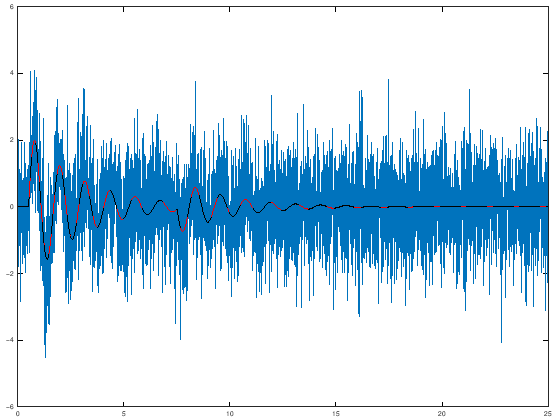

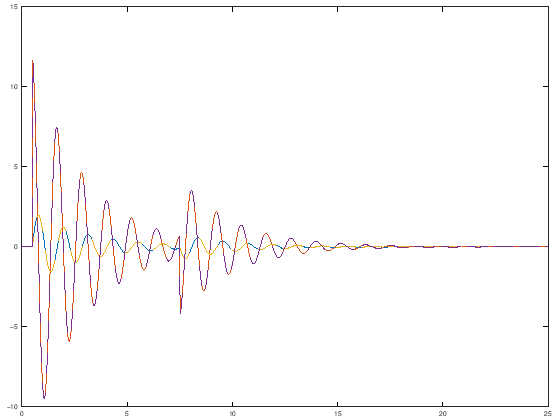

In [44]:
figure
[dy,dlkj,dx] = lsim(dsysC,uAUG);
plot(dlkj,dy)
[dxtrue,dt] = lsim(dsysFull,uAUG);
hold on
plot(dt,dxtrue(:,1),'r','LineWidth',2.0)
[dx,dt] = lsim(dsysKF,[u;dy']'');
plot(dt,dx(:,1),'k--','LineWidth',2.0)
figure
plot(dt,dxtrue,'-',dt,dx,'--','LineWidth',2)

Discretized